<a href="https://colab.research.google.com/github/assaabriiii/My-Machine-Learning-Journey/blob/main/face_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Lambda, Dropout
import tensorflow.keras.backend as K

In [ ]:
import opendatasets as od

In [32]:
od.download("https://www.kaggle.com/datasets/msambare/fer2013")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: assaabriiii
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 1.49GB/s]

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [55]:
train_gen = datagen.flow_from_directory(
    'fer2013/train/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
)

Found 22968 images belonging to 7 classes.


In [56]:
validation_gen = datagen.flow_from_directory(
    'fer2013/test/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)

Found 1432 images belonging to 7 classes.


In [57]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(train_gen, epochs=10, validation_data=validation_gen)

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.2794 - loss: 1.7574 - val_accuracy: 0.4022 - val_loss: 1.5485
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4554 - loss: 1.4194 - val_accuracy: 0.5056 - val_loss: 1.2946
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5181 - loss: 1.2640 - val_accuracy: 0.5007 - val_loss: 1.2705
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5619 - loss: 1.1598 - val_accuracy: 0.5230 - val_loss: 1.2441
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6090 - loss: 1.0385 - val_accuracy: 0.5286 - val_loss: 1.1949
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6425 - loss: 0.9572 - val_accuracy: 0.5454 - val_loss: 1.2480
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6852 - loss: 0.8545 - val_accuracy: 0.5496 - val_loss: 1.2547
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7228 - loss: 0.7529 - 

In [60]:
model.save("face_detector.h5")

In [61]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,143 (16.61 MB)

 Trainable params: 1,451,047 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,902,096 (11.07 MB)

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'fer2013/train/',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training',
)


validation_gen = datagen.flow_from_directory(
    'fer2013/test/',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)


model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_2.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_emotion_model.h5', monitor='val_accuracy', save_best_only=True)

history = model_2.fit(
    train_gen,
    epochs=50,
    validation_data=validation_gen,
    callbacks=[early_stop, checkpoint]
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,721,415 (6.57 MB)

 Trainable params: 1,720,583 (6.56 MB)

 Non-trainable params: 832 (3.25 KB)

Epoch 1/50
716/718 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2511 - loss: 2.1665

718/718 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.2512 - loss: 2.1651 - val_accuracy: 0.3436 - val_loss: 1.7584
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3615 - loss: 1.5970

718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.3616 - loss: 1.5970 - val_accuracy: 0.3980 - val_loss: 1.5548
Epoch 3/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4222 - loss: 1.4890

718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4222 - loss: 1.4890 - val_accuracy: 0.4483 - val_loss: 1.5027
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4617 - loss: 1.3965 - val_accuracy: 0.2758 - val_loss: 1.8238
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4883 - loss: 1.3318 - val_accuracy: 0.3911 - val_loss: 1.5061
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5011 - loss: 1.2919

718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5011 - loss: 1.2919 - val_accuracy: 0.5063 - val_loss: 1.2668
Epoch 7/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5269 - loss: 1.2417

718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5268 - loss: 1.2417 - val_accuracy: 0.5182 - val_loss: 1.4416
Epoch 8/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5346 - loss: 1.2226

718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5346 - loss: 1.2227 - val_accuracy: 0.5349 - val_loss: 1.2233
Epoch 9/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5434 - loss: 1.1954

718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5434 - loss: 1.1954 - val_accuracy: 0.5538 - val_loss: 1.1676
Epoch 10/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5639 - loss: 1.1450

718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5639 - loss: 1.1450 - val_accuracy: 0.5887 - val_loss: 1.1023
Epoch 11/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5706 - loss: 1.1307 - val_accuracy: 0.5433 - val_loss: 1.2163
Epoch 12/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5878 - loss: 1.0944 - val_accuracy: 0.5524 - val_loss: 1.2080
Epoch 13/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6024 - loss: 1.0592 - val_accuracy: 0.5684 - val_loss: 1.1553
Epoch 14/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.6152 - loss: 1.0240 - val_accuracy: 0.5726 - val_loss: 1.1587
Epoch 15/50
715/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6265 - loss: 0.9933

718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6265 - loss: 0.9934 - val_accuracy: 0.6020 - val_loss: 1.1026
Epoch 16/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6353 - loss: 0.9603 - val_accuracy: 0.5922 - val_loss: 1.1007
Epoch 17/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6564 - loss: 0.9230

718/718 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.6564 - loss: 0.9230 - val_accuracy: 0.6152 - val_loss: 1.1047
Epoch 18/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6611 - loss: 0.8913 - val_accuracy: 0.5817 - val_loss: 1.2076
Epoch 19/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6697 - loss: 0.8787 - val_accuracy: 0.5880 - val_loss: 1.4302
Epoch 20/50
715/718 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6855 - loss: 0.8332

718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6854 - loss: 0.8333 - val_accuracy: 0.6446 - val_loss: 1.1155
Epoch 21/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6940 - loss: 0.8124 - val_accuracy: 0.6236 - val_loss: 1.1259
Epoch 22/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6975 - loss: 0.7867 - val_accuracy: 0.6327 - val_loss: 1.0861
Epoch 23/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7128 - loss: 0.7676 - val_accuracy: 0.6173 - val_loss: 1.1791
Epoch 24/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7204 - loss: 0.7475 - val_accuracy: 0.6355 - val_loss: 1.1341
Epoch 25/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7292 - loss: 0.7145 - val_accuracy: 0.6138 - val_loss: 1.5414
Epoch 26/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7461 - loss: 0.6910 - val_accuracy: 0.6327 - val_loss: 1.1485
Epoch 27/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7534 - loss: 0.6624 - val_

In [65]:
model_2.save('face_detector_better.h5')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,720,839 (6.56 MB)

 Trainable params: 1,720,007 (6.56 MB)

 Non-trainable params: 832 (3.25 KB)

Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2243 - loss: 2.2277
Epoch 1: val_accuracy improved from -inf to 0.24160, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.2243 - loss: 2.2273 - val_accuracy: 0.2416 - val_loss: 3.2712
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2503 - loss: 1.8137
Epoch 2: val_accuracy improved from 0.24160 to 0.26703, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.2503 - loss: 1.8137 - val_accuracy: 0.2670 - val_loss: 2.2380
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2639 - loss: 1.7841
Epoch 3: val_accuracy did not improve from 0.26703
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.2639 - loss: 1.7841 - val_accuracy: 0.2559 - val_loss: 1.8223
Epoch 4/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2843 - loss: 1.7403
Epoch 4: val_accuracy improved from 0.26703 to 0.29507, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.2843 - loss: 1.7403 - val_accuracy: 0.2951 - val_loss: 1.7302
Epoch 5/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3057 - loss: 1.7018
Epoch 5: val_accuracy improved from 0.29507 to 0.32625, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3057 - loss: 1.7018 - val_accuracy: 0.3262 - val_loss: 1.6455
Epoch 6/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3145 - loss: 1.6795
Epoch 6: val_accuracy did not improve from 0.32625
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3145 - loss: 1.6795 - val_accuracy: 0.3210 - val_loss: 1.6936
Epoch 7/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3337 - loss: 1.6557
Epoch 7: val_accuracy did not improve from 0.32625
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3338 - loss: 1.6556 - val_accuracy: 0.1521 - val_loss: 2.3219
Epoch 8/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3515 - loss: 1.6267
Epoch 8: val_accuracy improved from 0.32625 to 0.35621, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3515 - loss: 1.6267 - val_accuracy: 0.3562 - val_loss: 1.5810
Epoch 9/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3699 - loss: 1.5906
Epoch 9: val_accuracy improved from 0.35621 to 0.38669, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.3699 - loss: 1.5906 - val_accuracy: 0.3867 - val_loss: 1.5611
Epoch 10/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3774 - loss: 1.5768
Epoch 10: val_accuracy did not improve from 0.38669
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.3774 - loss: 1.5768 - val_accuracy: 0.3839 - val_loss: 1.5528
Epoch 11/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3920 - loss: 1.5417
Epoch 11: val_accuracy improved from 0.38669 to 0.43651, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.3920 - loss: 1.5417 - val_accuracy: 0.4365 - val_loss: 1.4649
Epoch 12/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4064 - loss: 1.5185
Epoch 12: val_accuracy did not improve from 0.43651
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4064 - loss: 1.5185 - val_accuracy: 0.4248 - val_loss: 1.4727
Epoch 13/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4136 - loss: 1.4972
Epoch 13: val_accuracy improved from 0.43651 to 0.43877, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4136 - loss: 1.4972 - val_accuracy: 0.4388 - val_loss: 1.4413
Epoch 14/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4176 - loss: 1.4881
Epoch 14: val_accuracy did not improve from 0.43877
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4176 - loss: 1.4881 - val_accuracy: 0.4266 - val_loss: 1.4813
Epoch 15/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4342 - loss: 1.4690
Epoch 15: val_accuracy improved from 0.43877 to 0.45428, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4342 - loss: 1.4690 - val_accuracy: 0.4543 - val_loss: 1.4046
Epoch 16/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4405 - loss: 1.4433
Epoch 16: val_accuracy improved from 0.45428 to 0.46264, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4405 - loss: 1.4433 - val_accuracy: 0.4626 - val_loss: 1.3887
Epoch 17/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4495 - loss: 1.4285
Epoch 17: val_accuracy improved from 0.46264 to 0.47588, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4495 - loss: 1.4285 - val_accuracy: 0.4759 - val_loss: 1.3666
Epoch 18/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4555 - loss: 1.4116
Epoch 18: val_accuracy did not improve from 0.47588
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4555 - loss: 1.4116 - val_accuracy: 0.4039 - val_loss: 1.5234
Epoch 19/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4647 - loss: 1.4012
Epoch 19: val_accuracy improved from 0.47588 to 0.49922, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4647 - loss: 1.4012 - val_accuracy: 0.4992 - val_loss: 1.3165
Epoch 20/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4680 - loss: 1.3877
Epoch 20: val_accuracy improved from 0.49922 to 0.50148, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4680 - loss: 1.3877 - val_accuracy: 0.5015 - val_loss: 1.3216
Epoch 21/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4797 - loss: 1.3757
Epoch 21: val_accuracy did not improve from 0.50148
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4797 - loss: 1.3757 - val_accuracy: 0.4912 - val_loss: 1.3222
Epoch 22/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4768 - loss: 1.3782
Epoch 22: val_accuracy improved from 0.50148 to 0.50618, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4768 - loss: 1.3782 - val_accuracy: 0.5062 - val_loss: 1.3089
Epoch 23/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4825 - loss: 1.3616
Epoch 23: val_accuracy improved from 0.50618 to 0.51071, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4825 - loss: 1.3616 - val_accuracy: 0.5107 - val_loss: 1.3131
Epoch 24/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4943 - loss: 1.3431
Epoch 24: val_accuracy improved from 0.51071 to 0.51646, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4943 - loss: 1.3431 - val_accuracy: 0.5165 - val_loss: 1.2819
Epoch 25/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4901 - loss: 1.3561
Epoch 25: val_accuracy did not improve from 0.51646
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4901 - loss: 1.3561 - val_accuracy: 0.4898 - val_loss: 1.3160
Epoch 26/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4948 - loss: 1.3295
Epoch 26: val_accuracy improved from 0.51646 to 0.52099, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4948 - loss: 1.3295 - val_accuracy: 0.5210 - val_loss: 1.2549
Epoch 27/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4988 - loss: 1.3323
Epoch 27: val_accuracy did not improve from 0.52099
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.4988 - loss: 1.3323 - val_accuracy: 0.4968 - val_loss: 1.3030
Epoch 28/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5081 - loss: 1.3068
Epoch 28: val_accuracy did not improve from 0.52099
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5081 - loss: 1.3069 - val_accuracy: 0.5074 - val_loss: 1.3071
Epoch 29/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5081 - loss: 1.3031
Epoch 29: val_accuracy did not improve from 0.52099
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5081 - loss: 1.3031 - val_accuracy: 0.4503 - val_loss: 1.4009
Epoch 30/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5079 - loss: 1.3100
Epoch 30: val_ac

718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5080 - loss: 1.3100 - val_accuracy: 0.5248 - val_loss: 1.2621
Epoch 31/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5096 - loss: 1.3077
Epoch 31: val_accuracy improved from 0.52482 to 0.52726, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5096 - loss: 1.3077 - val_accuracy: 0.5273 - val_loss: 1.2665
Epoch 32/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5162 - loss: 1.2764
Epoch 32: val_accuracy improved from 0.52726 to 0.52883, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.5162 - loss: 1.2764 - val_accuracy: 0.5288 - val_loss: 1.2406
Epoch 33/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5211 - loss: 1.2691
Epoch 33: val_accuracy improved from 0.52883 to 0.53423, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5211 - loss: 1.2691 - val_accuracy: 0.5342 - val_loss: 1.2320
Epoch 34/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5236 - loss: 1.2787
Epoch 34: val_accuracy improved from 0.53423 to 0.54625, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5236 - loss: 1.2787 - val_accuracy: 0.5462 - val_loss: 1.2142
Epoch 35/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5295 - loss: 1.2568
Epoch 35: val_accuracy did not improve from 0.54625
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5295 - loss: 1.2568 - val_accuracy: 0.5365 - val_loss: 1.2192
Epoch 36/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5296 - loss: 1.2616
Epoch 36: val_accuracy improved from 0.54625 to 0.55269, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5296 - loss: 1.2616 - val_accuracy: 0.5527 - val_loss: 1.2199
Epoch 37/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5335 - loss: 1.2563
Epoch 37: val_accuracy did not improve from 0.55269
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5335 - loss: 1.2563 - val_accuracy: 0.5414 - val_loss: 1.2016
Epoch 38/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5283 - loss: 1.2433
Epoch 38: val_accuracy did not improve from 0.55269
718/718 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.5283 - loss: 1.2433 - val_accuracy: 0.5429 - val_loss: 1.2041
Epoch 39/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5273 - loss: 1.2549
Epoch 39: val_accuracy did not improve from 0.55269
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5273 - loss: 1.2548 - val_accuracy: 0.5365 - val_loss: 1.2105
Epoch 40/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5373 - loss: 1.2377
Epoch 40: val_ac

718/718 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.5373 - loss: 1.2377 - val_accuracy: 0.5574 - val_loss: 1.1907
Epoch 41/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5377 - loss: 1.2293
Epoch 41: val_accuracy did not improve from 0.55739
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5377 - loss: 1.2293 - val_accuracy: 0.5473 - val_loss: 1.1961
Epoch 42/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5436 - loss: 1.2268
Epoch 42: val_accuracy did not improve from 0.55739
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5436 - loss: 1.2268 - val_accuracy: 0.5541 - val_loss: 1.1920
Epoch 43/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5401 - loss: 1.2268
Epoch 43: val_accuracy improved from 0.55739 to 0.55844, saving model to best_emotion_model.h5


718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5401 - loss: 1.2268 - val_accuracy: 0.5584 - val_loss: 1.1611
Epoch 44/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5423 - loss: 1.2248
Epoch 44: val_accuracy did not improve from 0.55844
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5423 - loss: 1.2248 - val_accuracy: 0.5560 - val_loss: 1.1909
Epoch 45/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5515 - loss: 1.2129
Epoch 45: val_accuracy did not improve from 0.55844
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5515 - loss: 1.2129 - val_accuracy: 0.5335 - val_loss: 1.2205
Epoch 46/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5466 - loss: 1.2031
Epoch 46: val_accuracy did not improve from 0.55844
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5466 - loss: 1.2031 - val_accuracy: 0.5360 - val_loss: 1.2226
Epoch 47/50
717/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5485 - loss: 1.2038
Epoch 47: val_ac

718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5576 - loss: 1.1930 - val_accuracy: 0.5630 - val_loss: 1.1653
Epoch 50/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5469 - loss: 1.2043
Epoch 50: val_accuracy did not improve from 0.56297
718/718 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.5469 - loss: 1.2043 - val_accuracy: 0.5323 - val_loss: 1.2390
Evaluating on test set...
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5341 - loss: 1.1742
Test Accuracy: 0.5957


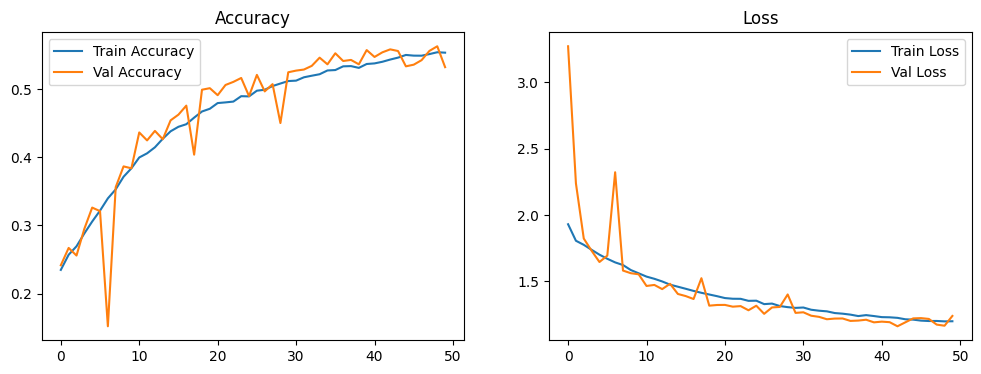

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# ------------------- DATA GENERATORS -------------------

# Augmentation for training only
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of TRAIN folder will be used for validation
)

# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator (80% of train folder)
train_gen = train_datagen.flow_from_directory(
    'fer2013/train/',           # Only use the train folder
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',     # ← IMPORTANT: grayscale!
    subset='training',          # 80% of train folder
    shuffle=True
)

# Validation generator (20% of train folder)
validation_gen = train_datagen.flow_from_directory(
    'fer2013/train/',           # Same folder as train
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',        # The split 20%
    shuffle=False
)

# Optional: Separate test generator (full test folder)
test_gen = val_test_datagen.flow_from_directory(
    'fer2013/test/',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

# ------------------- MODEL -------------------

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # ← 1 channel for grayscale
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_2.summary()

# ------------------- CALLBACKS & TRAINING -------------------

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_emotion_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

history = model_2.fit(
    train_gen,
    epochs=50,
    validation_data=validation_gen,
    callbacks=[early_stop, checkpoint]
)

# Optional: Evaluate on full test set
print("Evaluating on test set...")
test_loss, test_acc = model_2.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()